# Logistic Classifier (Regression)
- Consider binary classification and fit the probability
- The **logistic function** is sigmoid: $\displaystyle \sigma(t) = \frac{1}{1+e^{-t}}$ (posterior is a function of log(bayes factor))

## Simple binary classification in 1D
- Plug in a linear model $t=\beta^T \phi(x)$, as we did for linear regression
- Fit the log of the probability ratio of the classes, e.g., $\displaystyle \log \frac{ {P}(C_1| x)}{ {P}(C_0| x)} = \beta_0 + \beta_1 x$
    - where $\displaystyle {P}(C_0| x) = 1 - {P}(C_1| x)$ hence $\displaystyle P(C_1|x) = \frac{1}{1+e^{-(\beta_0+\beta_1 x)}}$

## Fit & Predict
- Training set $\big\{(x_i, c_i)\big\}$: $ \displaystyle \text{logit} \big( \pi(x) \big) = \log \left[ \frac{\pi(x)}{1-\pi(x)} \right] = \beta_0 + \beta_1 x \qquad $ where $ \displaystyle \qquad \pi(x) = {P}(C_1| x) $
- **Fit**: maximize the log of $ \displaystyle \mathcal{L}(\beta) = \prod\limits_{i:\,c_i = 1} \pi(x_i; \beta) \  \prod\limits_{j:\,c_{j} = 0} \big[1 - \pi(x_j; \beta)\big] $
    - $ \displaystyle \hat{\beta} = \arg \max_{\beta}  \log \mathcal{L}(\beta) $
- **Predict**: evaluate $ \displaystyle P(C_1|x) = \pi\big(x;\hat{\beta}\big) \quad$ vs. $\quad{} P(C_0|x)=1- \pi\big(x;\hat{\beta}\big)$

Classes: [0 1]
Data: (100, 1)


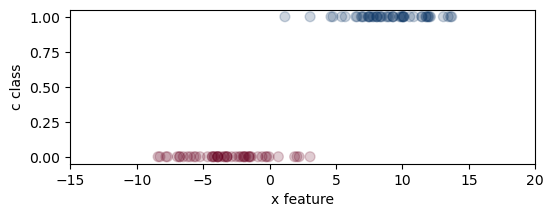

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

np.random.seed(42)
X, c = datasets.make_blobs(n_features=1, centers=2, cluster_std=3)

print('Classes:', np.unique(c))
print('Data:', X.shape)

plt.figure(figsize=(6,2))
plt.scatter(X, c, c=c, s=50, alpha=0.2, cmap=plt.cm.RdBu)
plt.xlabel('x feature')
plt.ylabel('c class')
plt.xlim(-15,20);

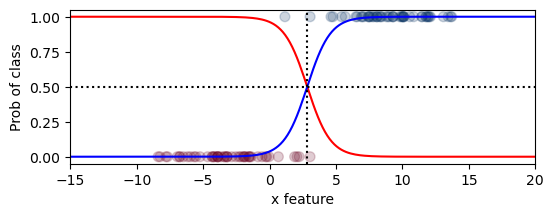

In [2]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X,c)

XX = np.linspace(-15,20,200)[:, np.newaxis]
cc = clf.predict_proba(XX)

plt.figure(figsize=(6,2))
plt.scatter(X, c, c=c, s=50, alpha=0.2, cmap=plt.cm.RdBu)
plt.xlabel('x feature')
plt.ylabel('Prob of class');

plt.plot(XX, cc[:,0], c='r');
plt.plot(XX, cc[:,1], c='b');
plt.axhline(y=0.5, color='k', linestyle=':')
plt.axvline(x=2.8, color='k', linestyle=':')
plt.xlim(-15,20);

## Iris Dataset: 2D only - classes 0 vs 1

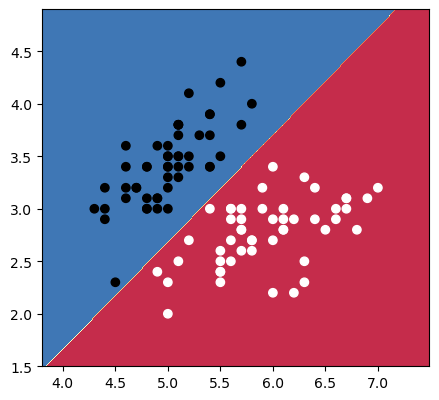

In [5]:
iris = datasets.load_iris()
X = iris.data[:,:2] # only first 2 features
c = iris.target
subset = c<2 # classes 0 and 1
X,c = X[subset,:], c[subset]

# grid for plotting
h = 0.01
x,y = np.meshgrid(np.arange(X[:,0].min()-.5, X[:,0].max()+.5, h),
                  np.arange(X[:,1].min()-.5, X[:,1].max()+.5, h))

# 2D model with x and y coordinates
clf = LogisticRegression()
clf.fit(X,c)

z = clf.predict(np.c_[x.ravel(),y.ravel()]).reshape(x.shape)
plt.figure(figsize=(5,5))
plt.subplot(1, 1, 1, aspect='equal')
plt.contourf(x,y,z, cmap=plt.cm.Spectral_r)
plt.scatter(X[:,0],X[:,1], c=c, cmap=plt.cm.gray);

## Iris Dataset: 2D only - classes 1 vs 2

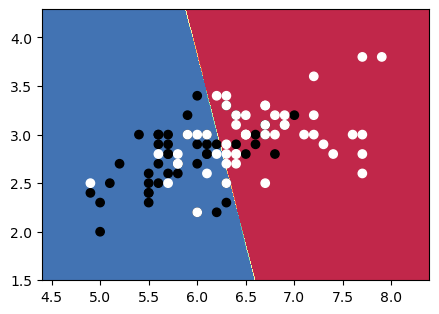

In [6]:
X = iris.data[:,:2] # only first 2 features
c = iris.target
subset = c>0 # classes 1 and 2
X,c = X[subset,:], c[subset]

# grid for plotting
h = 0.01
x,y = np.meshgrid(np.arange(X[:,0].min()-.5, X[:,0].max()+.5, h),
                  np.arange(X[:,1].min()-.5, X[:,1].max()+.5, h))

# 2D model with x and y coordinates
clf = LogisticRegression()
clf.fit(X,c)

z = clf.predict(np.c_[x.ravel(),y.ravel()]).reshape(x.shape)
plt.figure(figsize=(5,5))
plt.subplot(1, 1, 1, aspect='equal')
plt.contourf(x,y,z, cmap=plt.cm.Spectral_r)
plt.scatter(X[:,0],X[:,1], c=c, cmap=plt.cm.gray);

## Multiple classes
$ \displaystyle l(\beta) = \sum_{i=1}^{n} \log \pi_{g_i}(x_i; \beta) \qquad $ where $ \displaystyle \qquad \pi_{k}(x_i; \beta) = {P}(C_k \ | x_i; \  \beta) $

## Discriminative Probabilistic Approach
This is **discriminative** as opposed to the previous probabilistic methods that were **generative** and could, for example, provide random samples using the learned $p(x|C_k)$ likelihoods of the classes $\{C_k\}$.